In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path_file = "./output/mnist/acc/noniid/L10E2/"

In [2]:
#reading files
metisp1_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.10.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.20.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.30.weight.pth.acc.csv"
]

rnd_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part10_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part20_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
]


metisp1_dfs = []

n_metisp1_files = len(metisp1_files)
for i in range(n_metisp1_files):
    metisp1_dfs.append(pd.read_csv(path_file + metisp1_files[i]))

rnd_dfs = []

n_rnd_files = len(rnd_files)
for i in range(n_rnd_files):
    rnd_dfs.append(pd.read_csv(path_file + rnd_files[i]))

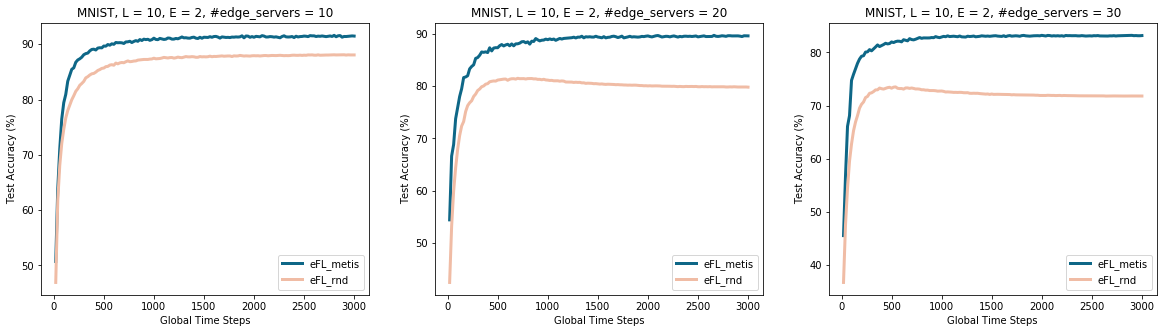

In [3]:
#plot
line_color = ["#0e6787", "#ad85ab", "#f0bca5"]
lbl_metisp1_cluster = ["eFL_metis: #edge_servers = 10", "eFL_metis: #edge_servers = 20", "eFL_metis: #edge_servers = 30"]
lbl_rnd_cluster = ["eFL_rnd: #edge_servers = 10", "eFL_rnd: #edge_servers = 20", "eFL_rnd: #edge_servers = 30"]
lbl_cluster = ["#edge_servers = 10", "#edge_servers = 20", "#edge_servers = 30"]
fig, ax = plt.subplots(1, 3, figsize=(20,5))

for i in range(n_metisp1_files):
    l1, = ax[i].plot(metisp1_dfs[i].global_round, metisp1_dfs[i].test_acc, label = "eFL_metis", c = line_color[0], linewidth=3)
    l2, = ax[i].plot(rnd_dfs[i].global_round, rnd_dfs[i].test_acc, label = "eFL_rnd", c = line_color[2], linewidth = 3) #, linestyle = '-.'

    ax[i].set_title("MNIST, L = 10, E = 2, " + lbl_cluster[i])
    ax[i].set_ylabel("Test Accuracy (%)")
    ax[i].set_xlabel("Global Time Steps")
    ax[i].legend([l1, l2], ["eFL_metis", "eFL_rnd"], loc='best')


plt.show()

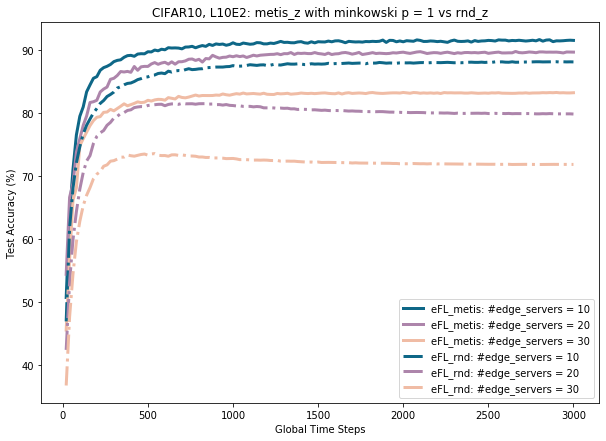

In [4]:
#plot

line_color = ["#0e6787", "#ad85ab", "#f0bca5"]
lbl_metisp1_cluster = ["eFL_metis: #edge_servers = 10", "eFL_metis: #edge_servers = 20", "eFL_metis: #edge_servers = 30"]
lbl_rnd_cluster = ["eFL_rnd: #edge_servers = 10", "eFL_rnd: #edge_servers = 20", "eFL_rnd: #edge_servers = 30"]

fig, ax = plt.subplots(figsize=(10,7))

for i in range(n_metisp1_files):
    ax.plot(metisp1_dfs[i].global_round, metisp1_dfs[i].test_acc, label = lbl_metisp1_cluster[i], c = line_color[i], linewidth=3)

for i in range(n_rnd_files):
    ax.plot(rnd_dfs[i].global_round, rnd_dfs[i].test_acc, label = lbl_rnd_cluster[i], c = line_color[i], linewidth = 3, ls = '-.')

ax.set_title("CIFAR10, L10E2: metis_z with minkowski p = 1 vs rnd_z")
ax.set_ylabel("Test Accuracy (%)")
ax.set_xlabel("Global Time Steps")
ax.legend(loc='best')


plt.show()
